In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
dermatology = fetch_ucirepo(id=33) 
  
# data (as pandas dataframes) 
X = dermatology.data.features 
y = dermatology.data.targets 
  
# metadata 
print(dermatology.metadata) 
  
# variable information 
print(dermatology.variables) 

{'uci_id': 33, 'name': 'Dermatology', 'repository_url': 'https://archive.ics.uci.edu/dataset/33/dermatology', 'data_url': 'https://archive.ics.uci.edu/static/public/33/data.csv', 'abstract': 'Aim for this dataset is to determine the type of Eryhemato-Squamous Disease.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 366, 'num_features': 34, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C5FK5P', 'creators': ['Nilsel Ilter', 'H. Guvenir'], 'intro_paper': {'title': 'Learning differential diagnosis of erythemato-squamous diseases using voting feature intervals', 'authors': 'H. Altay Güvenir, G. Demiröz, N. Ilter', 'published_in': 'Artif. Intell. Medicine', 'year': 1998, 'url': 'https://www.semanticscholar

In [3]:
print(X.shape)
print(y.shape)

(366, 34)
(366, 1)


In [4]:
X.head()

,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age
0,2,2,0,3,0,0,0,0,1,0,...,0,0,0,3,0,0,0,1,0,55.0
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,8.0
2,2,1,2,3,1,3,0,3,0,0,...,2,0,2,3,2,0,0,2,3,26.0
3,2,2,2,0,0,0,0,0,3,2,...,0,3,0,0,0,0,0,3,0,40.0
4,2,3,2,2,2,2,0,2,0,0,...,2,2,3,2,3,0,0,2,3,45.0


In [5]:
X.tail()

,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age
361,2,1,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,2,0,25.0
362,3,2,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,2,0,36.0
363,3,2,2,2,3,2,0,2,0,0,...,3,0,3,0,3,0,0,2,3,28.0
364,2,1,3,1,2,3,0,2,0,0,...,3,0,2,0,1,0,0,2,3,50.0
365,3,2,2,0,0,0,0,0,3,3,...,0,2,0,0,0,0,0,3,0,35.0


In [6]:
df_data = pd.concat([X, y], axis=1)
df_data.shape

(366, 35)

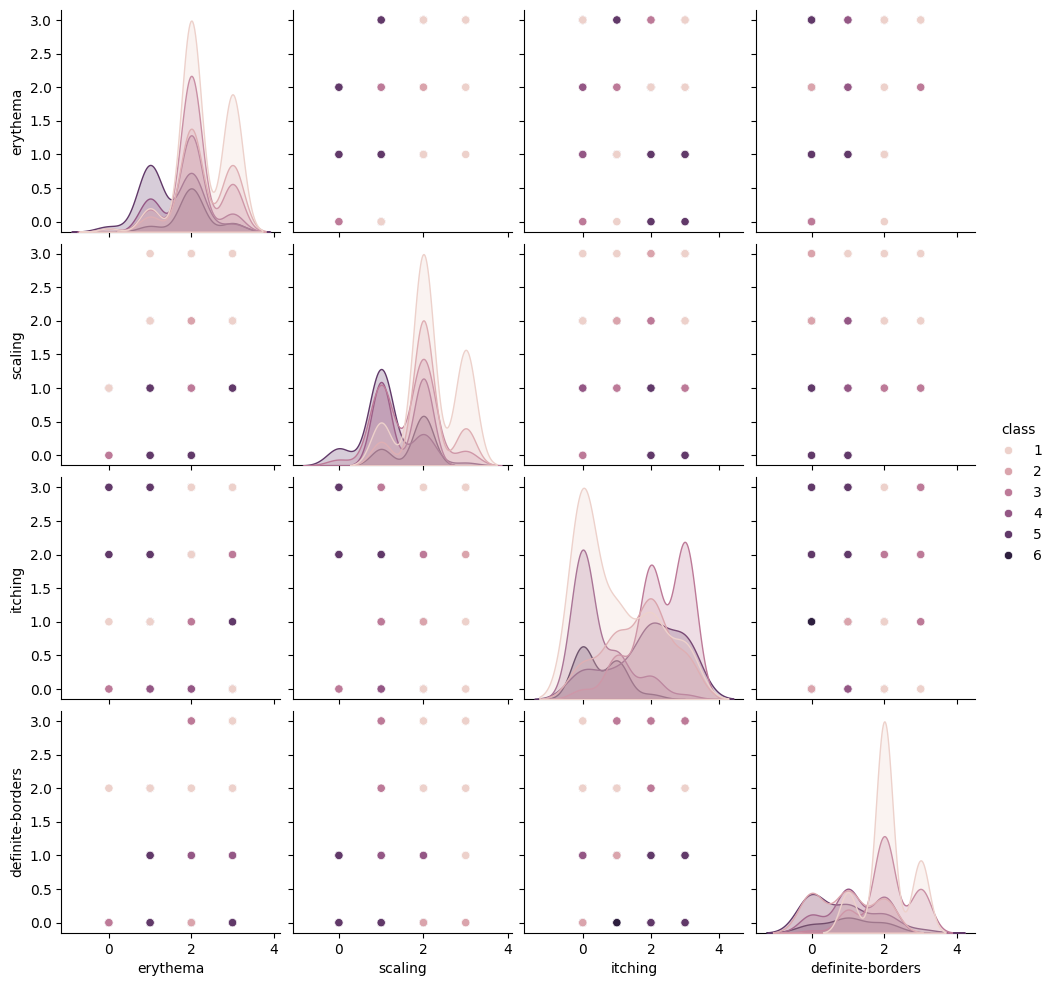

In [7]:
sns.pairplot(df_data, hue='class', vars=['erythema', 'scaling', 'itching', 'definite-borders'])

<Axes: xlabel='class', ylabel='count'>

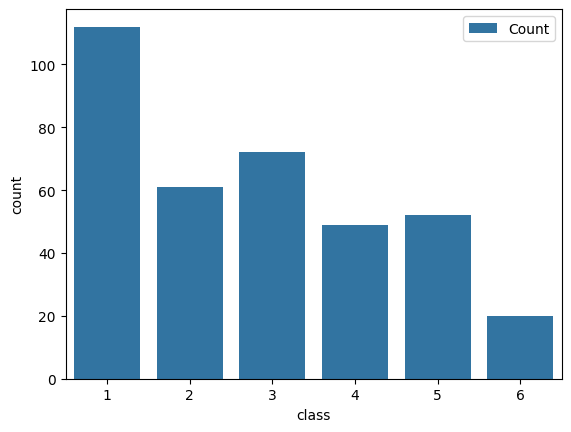

In [8]:
sns.countplot(x=df_data['class'], label="Count")

<Axes: xlabel='parakeratosis', ylabel='hyperkeratosis'>

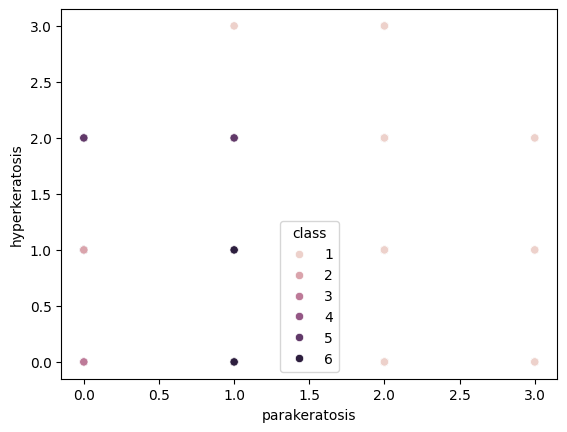

In [9]:
sns.scatterplot(x='parakeratosis', y='hyperkeratosis', hue='class', data=df_data)

<Axes: >

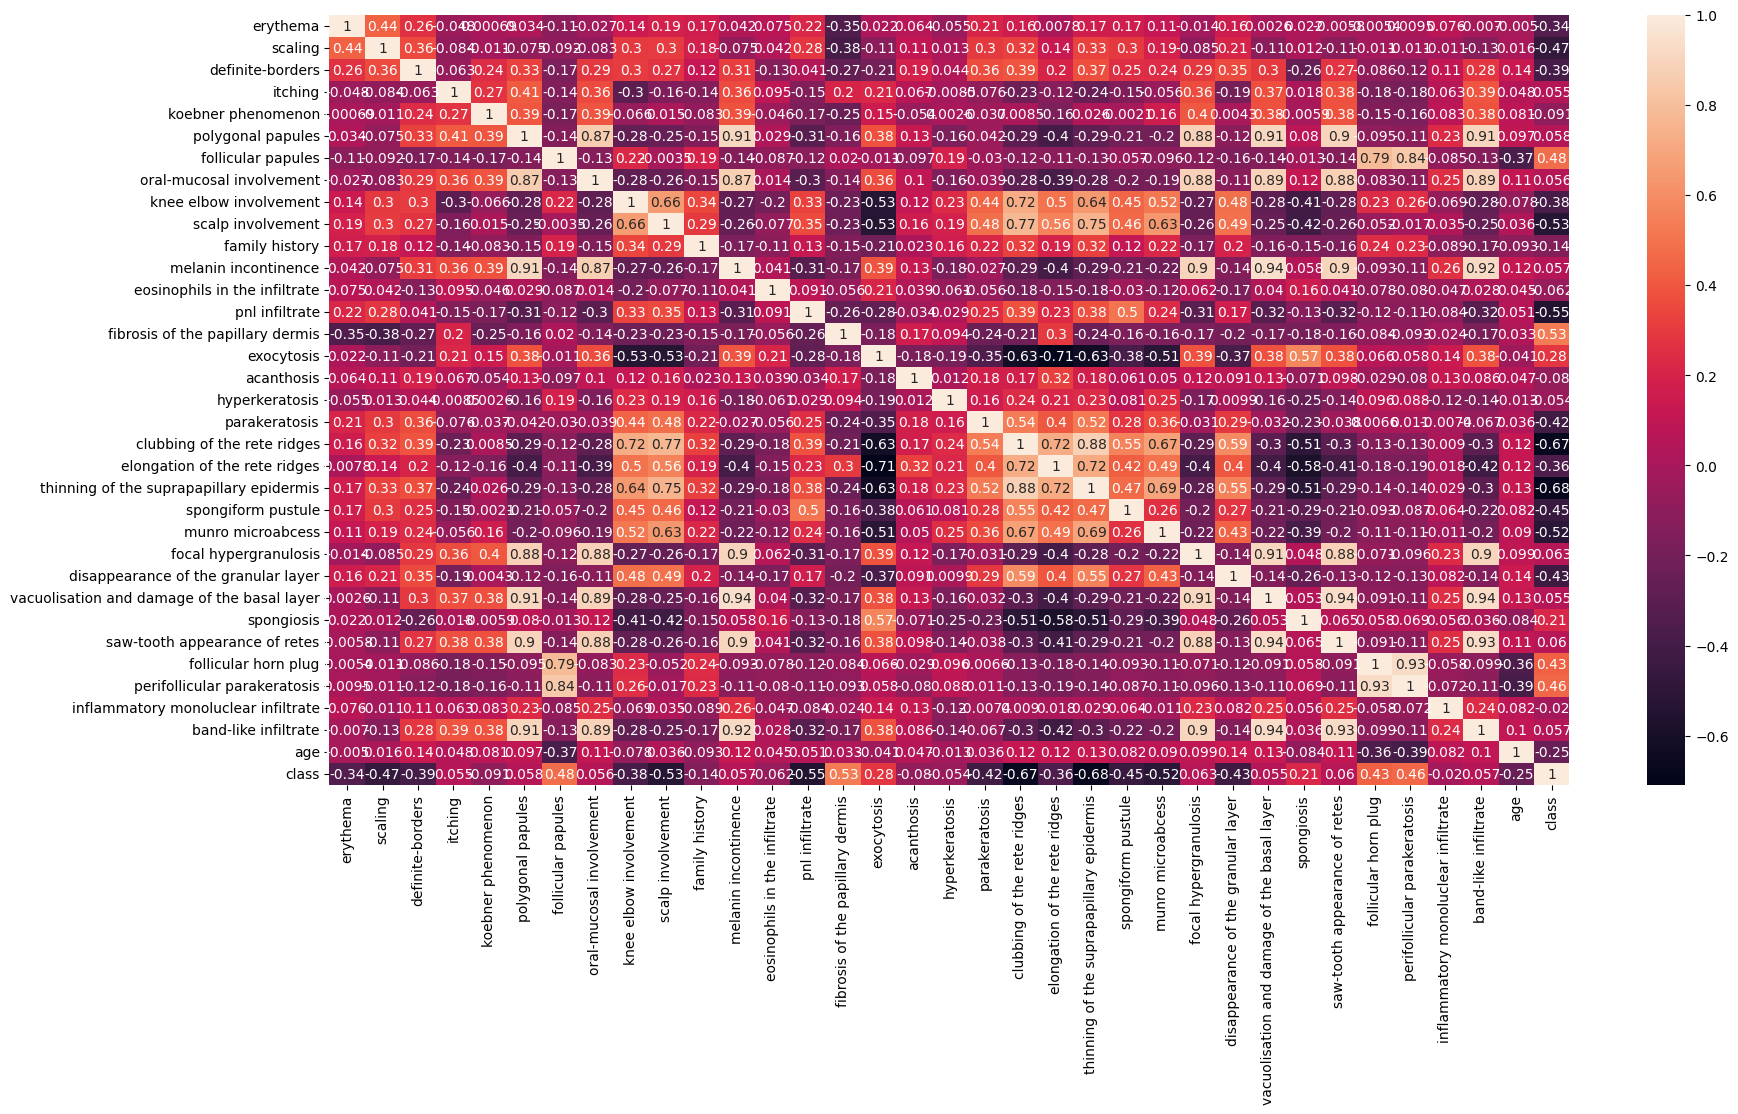

In [10]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df_data.corr(), annot=True)

In [11]:
df_data = df_data.dropna()

In [12]:
X = df_data.drop(['class'],axis=1)
X

,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age
0,2,2,0,3,0,0,0,0,1,0,...,0,0,0,3,0,0,0,1,0,55.0
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,8.0
2,2,1,2,3,1,3,0,3,0,0,...,2,0,2,3,2,0,0,2,3,26.0
3,2,2,2,0,0,0,0,0,3,2,...,0,3,0,0,0,0,0,3,0,40.0
4,2,3,2,2,2,2,0,2,0,0,...,2,2,3,2,3,0,0,2,3,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,2,0,25.0
362,3,2,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,2,0,36.0
363,3,2,2,2,3,2,0,2,0,0,...,3,0,3,0,3,0,0,2,3,28.0
364,2,1,3,1,2,3,0,2,0,0,...,3,0,2,0,1,0,0,2,3,50.0


In [13]:
y = df_data['class']
y

0      2
1      1
2      3
3      1
4      3
      ..
361    4
362    4
363    3
364    3
365    1
Name: class, Length: 358, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5)

In [15]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(286, 34) (72, 34) (286,) (72,)


In [16]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [17]:
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

<Axes: >

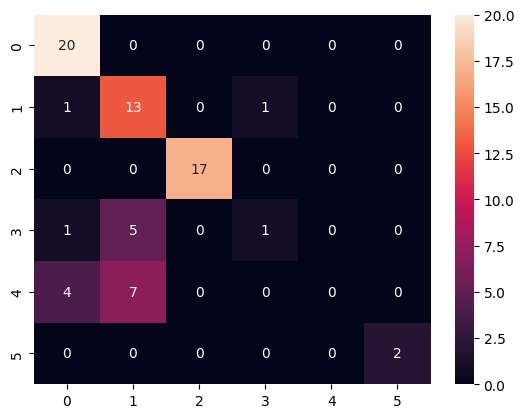

In [18]:
sns.heatmap(cm, annot=True)

In [19]:
print(classification_report(y_test, y_predict, zero_division=1.0))

              precision    recall  f1-score   support

           1       0.77      1.00      0.87        20
           2       0.52      0.87      0.65        15
           3       1.00      1.00      1.00        17
           4       0.50      0.14      0.22         7
           5       1.00      0.00      0.00        11
           6       1.00      1.00      1.00         2

    accuracy                           0.74        72
   macro avg       0.80      0.67      0.62        72
weighted avg       0.79      0.74      0.66        72



In [20]:
min_train = X_train.min()
min_train

erythema                                       0.0
scaling                                        0.0
definite-borders                               0.0
itching                                        0.0
koebner phenomenon                             0.0
polygonal papules                              0.0
follicular papules                             0.0
oral-mucosal involvement                       0.0
knee elbow involvement                         0.0
scalp involvement                              0.0
family history                                 0.0
melanin incontinence                           0.0
eosinophils in the infiltrate                  0.0
pnl infiltrate                                 0.0
fibrosis of the papillary dermis               0.0
exocytosis                                     0.0
acanthosis                                     0.0
hyperkeratosis                                 0.0
parakeratosis                                  0.0
clubbing of the rete ridges    

In [21]:
range_train = (X_train - min_train).max()
range_train

erythema                                        3.0
scaling                                         3.0
definite-borders                                3.0
itching                                         3.0
koebner phenomenon                              3.0
polygonal papules                               3.0
follicular papules                              3.0
oral-mucosal involvement                        3.0
knee elbow involvement                          3.0
scalp involvement                               3.0
family history                                  1.0
melanin incontinence                            3.0
eosinophils in the infiltrate                   2.0
pnl infiltrate                                  3.0
fibrosis of the papillary dermis                3.0
exocytosis                                      3.0
acanthosis                                      3.0
hyperkeratosis                                  3.0
parakeratosis                                   3.0
clubbing of 

In [22]:
X_train_scaled = (X_train - min_train)/range_train
X_train_scaled

,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age
37,0.666667,0.333333,0.333333,0.333333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.666667,0.0,0.000000,0.000000,0.333333,0.0,0.200000
308,0.666667,0.333333,0.333333,0.000000,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.666667,0.0,0.000000,0.000000,0.666667,0.0,0.160000
348,1.000000,0.666667,0.666667,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.000000,...,0.0,0.000000,0.0,0.666667,0.0,1.000000,0.666667,0.666667,0.0,0.133333
93,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,1.000000,1.000000,...,0.0,0.333333,0.0,0.000000,0.0,0.000000,0.000000,0.666667,0.0,0.560000
6,0.666667,0.333333,0.000000,0.666667,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.666667,0.0,0.240000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.666667,0.333333,0.666667,0.666667,0.666667,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.826667
122,0.333333,0.333333,0.666667,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.666667,0.666667,0.666667,0.0,0.093333
193,0.666667,0.666667,0.666667,0.000000,0.000000,0.000000,0.0,0.000000,0.666667,0.666667,...,0.0,0.666667,0.0,0.000000,0.0,0.000000,0.000000,0.666667,0.0,0.240000
210,1.000000,0.666667,0.666667,0.000000,0.000000,0.000000,0.0,0.000000,0.666667,0.666667,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.666667,0.0,0.666667


<Axes: xlabel='erythema', ylabel='scaling'>

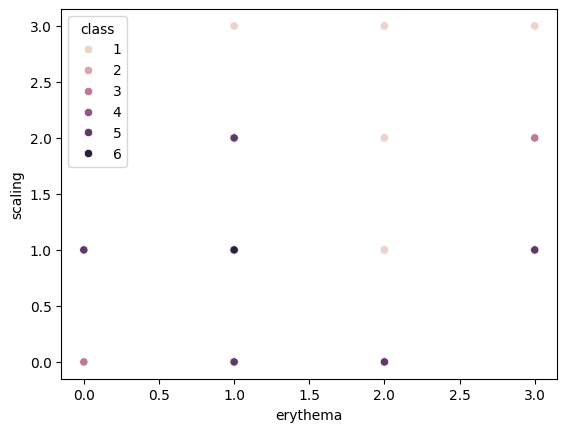

In [23]:
sns.scatterplot(x=X_train['erythema'], y=X_train['scaling'], hue=y_train)

<Axes: xlabel='erythema', ylabel='scaling'>

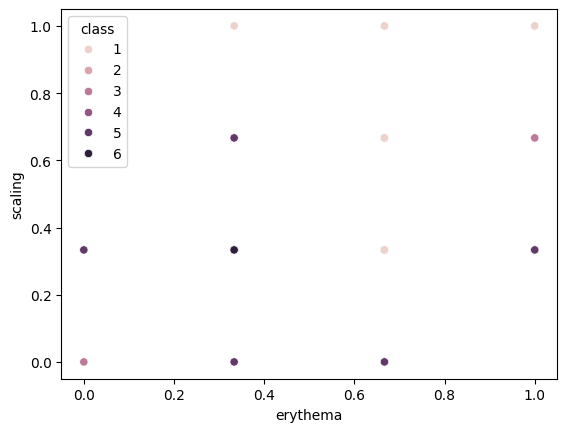

In [24]:
sns.scatterplot(x=X_train_scaled['erythema'], y=X_train_scaled['scaling'], hue=y_train)

In [25]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [26]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC()

<Axes: >

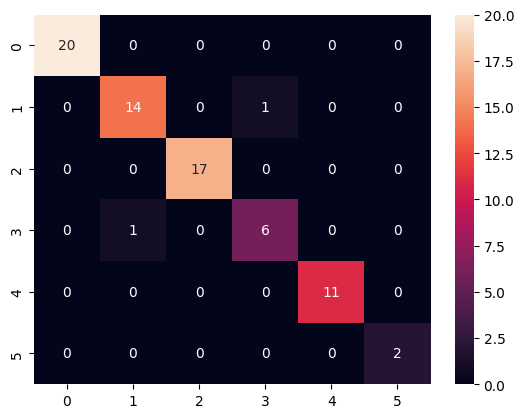

In [27]:
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm,annot=True,fmt="d")

In [28]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       0.93      0.93      0.93        15
           3       1.00      1.00      1.00        17
           4       0.86      0.86      0.86         7
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         2

    accuracy                           0.97        72
   macro avg       0.97      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72



In [29]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [32]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.466 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.439 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.404 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.474 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.456 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.672 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.737 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.310 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [33]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [34]:
grid.best_estimator_

SVC(C=1, gamma=0.1)

In [35]:
grid_predictions = grid.predict(X_test_scaled)

In [36]:
cm = confusion_matrix(y_test, grid_predictions)

<Axes: >

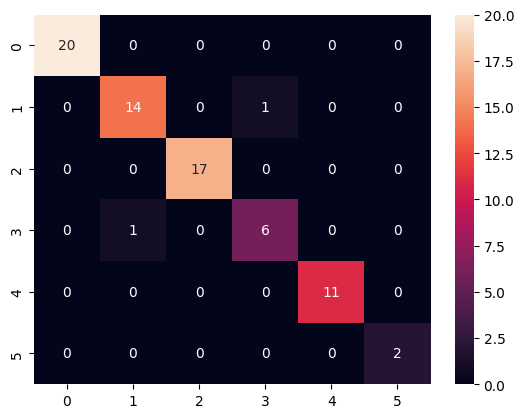

In [37]:
sns.heatmap(cm, annot=True)

In [38]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       0.93      0.93      0.93        15
           3       1.00      1.00      1.00        17
           4       0.86      0.86      0.86         7
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         2

    accuracy                           0.97        72
   macro avg       0.97      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72

